# Pandas

In [196]:
%matplotlib inline
import pandas as pd
import numpy as np

## Creating Dataframes
Dataframes are easiest think of as dictionary of numpy arrays on steriods. The 'arrays' are made up of homogenous data types but can each be different data type themselves. These arrays make up the columns, are referenced with a string label, and are called `Series`. Each `Dataframe` is made up of 1 or more Series. One of these `Series` are used as row index and by default is set to 0..n-1 so as to behave similarly to array indexing.

In [197]:
df = pd.DataFrame({"name": ["John", "Grace", "Turing", "Katie", "Ada"],
                   "age": [25, np.nan, 36, 34, 31],
                   "gpa": [2.5, 2.9, 3.3, np.nan, 3.9],
                   "class": [101, 201, np.nan, 201, 301],
                   "gender": ["m", "f", "m", "f", "f"]})


We can also read from csv files. The `pd.read_csv` function is nearly infinitely configurable, review documentation by doing pd.read_csv?. `index_col=0` tells it to use the first column as the index

In [198]:
data = pd.read_csv("data.csv", index_col=0)
data.head()

,ct,secs,cl
id,,,
1000025,5,2,2
1002945,5,7,2
1015425,3,2,2
1016277,6,3,2
1017023,4,2,2


## Accessing dataframes and series

In [199]:
df["name"] #Access the data for name

0      John
1     Grace
2    Turing
3     Katie
4       Ada
Name: name, dtype: object

In [200]:
df["name"][:2]

0     John
1    Grace
Name: name, dtype: object

In [201]:
df.iloc[:2] # sleect a whole row by location using .iloc

,name,age,gpa,class,gender
0,John,25.0,2.5,101.0,m
1,Grace,NaN,2.9,201.0,f


In [202]:
tmp_df = df.copy()
tmp_df.index = tmp_df["name"]
tmp_df

,name,age,gpa,class,gender
name,,,,,
John,John,25.0,2.5,101.0,m
Grace,Grace,NaN,2.9,201.0,f
Turing,Turing,36.0,3.3,NaN,m
Katie,Katie,34.0,NaN,201.0,f
Ada,Ada,31.0,3.9,301.0,f


We now have an index with the same values as the name column, let's get ride of the extra column. We use axis=1 to signify we want to dtop a column but to drop a row we'd pass axis=0 and identify it by the index name

In [203]:
tmp_df.drop("name", axis=1)
tmp_df.drop("John", axis=0)

,name,age,gpa,class,gender
name,,,,,
Grace,Grace,NaN,2.9,201.0,f
Turing,Turing,36.0,3.3,NaN,m
Katie,Katie,34.0,NaN,201.0,f
Ada,Ada,31.0,3.9,301.0,f


In [204]:
tmp_df # Doesn't replace the tmp_df, use inplace

,name,age,gpa,class,gender
name,,,,,
John,John,25.0,2.5,101.0,m
Grace,Grace,NaN,2.9,201.0,f
Turing,Turing,36.0,3.3,NaN,m
Katie,Katie,34.0,NaN,201.0,f
Ada,Ada,31.0,3.9,301.0,f


In [205]:
tmp_df.drop("name", axis=1, inplace=True)
tmp_df

,age,gpa,class,gender
name,,,,
John,25.0,2.5,101.0,m
Grace,NaN,2.9,201.0,f
Turing,36.0,3.3,NaN,m
Katie,34.0,NaN,201.0,f
Ada,31.0,3.9,301.0,f


Now that index is made up of something other than 0..n-1 integers we can use .loc to select a row by index name

In [206]:
tmp_df.loc["Grace"]

age         NaN
gpa         2.9
class     201.0
gender        f
Name: Grace, dtype: object

In [207]:
tmp_df.loc["Grace":"Turing"] # slices work but in .loc they include the endpoint of the slice

,age,gpa,class,gender
name,,,,
Grace,NaN,2.9,201.0,f
Turing,36.0,3.3,NaN,m


## Data Analysis
The first thing to do is get an idea of what the data looks like. For this we gather statistical features, many of which we can pick up using `.describe()`. This will return the mean, standard deviation, min, mac, and the quartiles

In [208]:
df.describe()

,age,gpa,class
count,4.000000,4.000000,4.000000
mean,31.500000,3.150000,201.000000
std,4.795832,0.597216,81.649658
min,25.000000,2.500000,101.000000
25%,29.500000,2.800000,176.000000
50%,32.500000,3.100000,201.000000
75%,34.500000,3.450000,226.000000
max,36.000000,3.900000,301.000000


We can also ask pandas to describe a particular column and if is of a certain type it will tell us how many unique values and the most common value.

In [209]:
df

,name,age,gpa,class,gender
0,John,25.0,2.5,101.0,m
1,Grace,NaN,2.9,201.0,f
2,Turing,36.0,3.3,NaN,m
3,Katie,34.0,NaN,201.0,f
4,Ada,31.0,3.9,301.0,f


In [210]:
df["name"].describe()

count        5
unique       5
top       John
freq         1
Name: name, dtype: object

In [211]:
df["name"].unique()

array(['John', 'Grace', 'Turing', 'Katie', 'Ada'], dtype=object)

In [212]:
data["cl"].unique()

array([2, 4])

In [213]:
data["cl"].value_counts() # 2 is twice as prevelant as 4

cl
2    413
4    232
Name: count, dtype: int64

In [214]:
df.mean(numeric_only=True) # many of obious stats fuctions will work here mean, std, max, min

age       31.50
gpa        3.15
class    201.00
dtype: float64

# Data cleanup and basic imputation
## Cleanup
If you noticed in the sample data I created for `df` there are some values marked `NaN` or not a number; this is a common way to mark missing data and pandas can do a variety of different things for us regarding cleaning up or imputing data. 

In [215]:
df.dropna() #drops rows that contain at least one column with missing

,name,age,gpa,class,gender
0,John,25.0,2.5,101.0,m
4,Ada,31.0,3.9,301.0,f


In [216]:
df.dropna(axis=1) #drop rows who have missing columns

,name,gender
0,John,m
1,Grace,f
2,Turing,m
3,Katie,f
4,Ada,f


## Imputation
Now lets say that instead of throwing out data we want to make some educated guesses using the data we do have. A simple thing might be to assign Jane's age as the mean of the other student's ages. This is easily done with the `.mean()` and `.fillna()` functions. Take note that `mean` by default calculates the mean by ignoring the `NaN` values

In [217]:
mean_age = int(df["age"].mean())
mean_age

31

In [218]:
#df["age"].fillna(mean_age, inplace=True)
df["age"] = df["age"].fillna(mean_age)
df

,name,age,gpa,class,gender
0,John,25.0,2.5,101.0,m
1,Grace,31.0,2.9,201.0,f
2,Turing,36.0,3.3,NaN,m
3,Katie,34.0,NaN,201.0,f
4,Ada,31.0,3.9,301.0,f


It might be reasonable to assign Frank to the class that most other people are taking

In [219]:
biggest_class = df["class"].mode() #Returns a vector because there can be multiple, 0 means it's the first mode
biggest_class

0    201.0
Name: class, dtype: float64

In [220]:
df["class"] = df["class"].fillna(biggest_class[0])
df

,name,age,gpa,class,gender
0,John,25.0,2.5,101.0,m
1,Grace,31.0,2.9,201.0,f
2,Turing,36.0,3.3,201.0,m
3,Katie,34.0,NaN,201.0,f
4,Ada,31.0,3.9,301.0,f


Build a simple model (contained in the function below). We will build more complicated and valid imputation models with scikit-learn and other packages later.

In [221]:
def model(age): #Calculate gpa from age
    gpa = age / 10
    gpa = max(1.0, gpa)
    return min(4.0, gpa)

In [222]:
model(41), model(25), model(5)

(4.0, 2.5, 1.0)

In [223]:
modeled_gpas = df["age"].apply(model)
modeled_gpas

0    2.5
1    3.1
2    3.6
3    3.4
4    3.1
Name: age, dtype: float64

In [224]:
df

,name,age,gpa,class,gender
0,John,25.0,2.5,101.0,m
1,Grace,31.0,2.9,201.0,f
2,Turing,36.0,3.3,201.0,m
3,Katie,34.0,NaN,201.0,f
4,Ada,31.0,3.9,301.0,f


In [225]:
df["gpa"] = df["gpa"].fillna(modeled_gpas)
df

,name,age,gpa,class,gender
0,John,25.0,2.5,101.0,m
1,Grace,31.0,2.9,201.0,f
2,Turing,36.0,3.3,201.0,m
3,Katie,34.0,3.4,201.0,f
4,Ada,31.0,3.9,301.0,f


In [226]:
df["model_gpa"] = modeled_gpas
df

,name,age,gpa,class,gender,model_gpa
0,John,25.0,2.5,101.0,m,2.5
1,Grace,31.0,2.9,201.0,f,3.1
2,Turing,36.0,3.3,201.0,m,3.6
3,Katie,34.0,3.4,201.0,f,3.4
4,Ada,31.0,3.9,301.0,f,3.1


In [227]:
new_row = ["Alice", 18, 3.2,  101, "f", model(18)]
new_row_df = pd.DataFrame([new_row], columns=df.columns)
df = pd.concat([pd.DataFrame([new_row], columns=df.columns), df], ignore_index=True)
df

,name,age,gpa,class,gender,model_gpa
0,Alice,18.0,3.2,101.0,f,1.8
1,John,25.0,2.5,101.0,m,2.5
2,Grace,31.0,2.9,201.0,f,3.1
3,Turing,36.0,3.3,201.0,m,3.6
4,Katie,34.0,3.4,201.0,f,3.4
5,Ada,31.0,3.9,301.0,f,3.1


## Plotting
Pandas make good use of matplotlib and allows us to do plots without getting into the lower-level matplotlib

In [231]:
import matplotlib.pyplot as plt

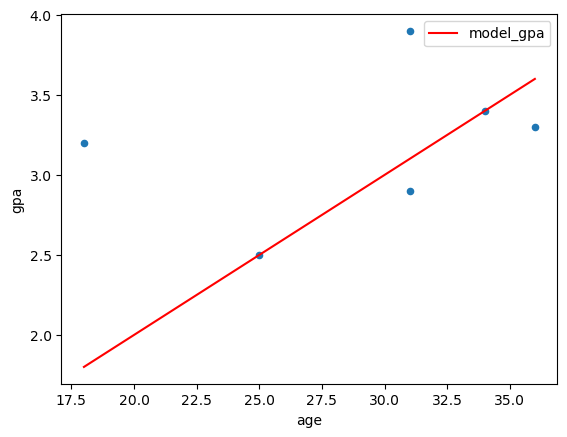

In [245]:
# we can plot age v. gpa to see how good or bad our model is
# we sort by the age first so the looks right
ax1 = df.sort_values("age").plot("age", "gpa", kind="scatter")
ax2 = df.sort_values("age").plot("age", "model_gpa", ax=ax1, c="r")
plt.show()

In [234]:
# Now let's use iris dataset
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [235]:
list(enumerate(iris.feature_names))

[(0, 'sepal length (cm)'),
 (1, 'sepal width (cm)'),
 (2, 'petal length (cm)'),
 (3, 'petal width (cm)')]

In [238]:
iris.data[:, 0] # First column

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [244]:
tmp = {}
for i, name in enumerate(iris.feature_names):
    tmp[name] = iris.data[:, i] # Have the headers be the key to the data by assocating it with their column
tmp
targets = []
for t in iris.target:
    targets += [iris.target_names[t]]
tmp["target"] = targets
iris_df = pd.DataFrame(tmp)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Using list comprehension now

In [246]:
tmp = {name: iris.data[:,i] for i,name in enumerate(iris.feature_names)}
tmp["target"] = [iris.target_names[i] for i in iris.target]
iris_df = pd.DataFrame(tmp)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [248]:
iris_df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]

In [249]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [250]:
iris_df["target"].describe()

count        150
unique         3
top       setosa
freq          50
Name: target, dtype: object

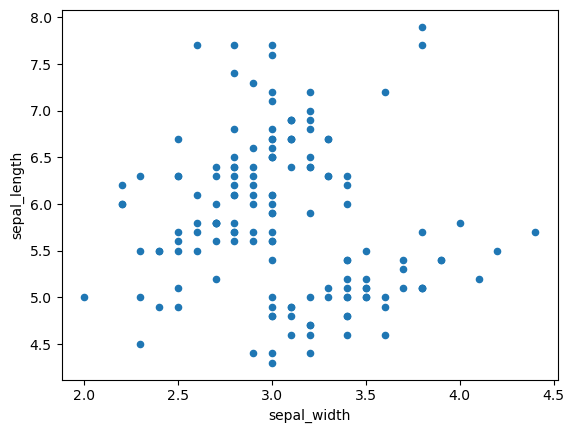

In [251]:
# Pandas automatically assigns separate colors when potting only two columns
iris_df.plot(x="sepal_width", y="sepal_length", kind="scatter")
plt.show()

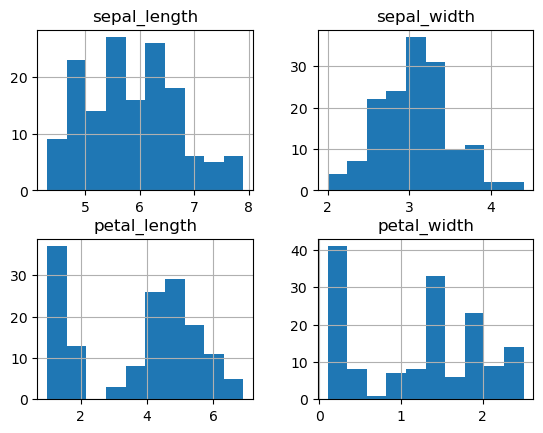

In [255]:
iris_df.hist();
plt.show()

In [256]:
# Useful plot is scatter_matric, helps us determine correlations between variables (off-diagonals) and the distribution of each vairable (diagonal axis)
from pandas.plotting import scatter_matrix

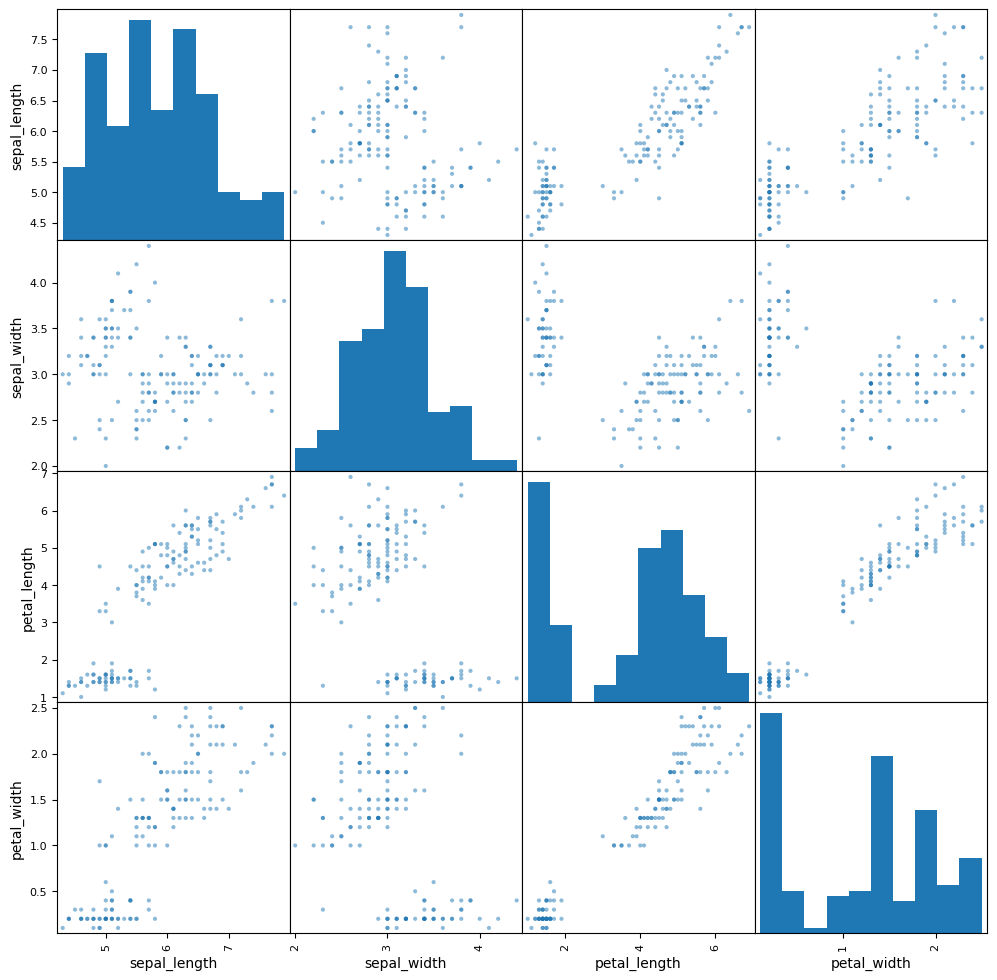

In [259]:
scatter_matrix(iris_df, figsize=(12,12))
plt.show()